# Numerical simulation of Raman sideband cooling
## Created on 30th September, 2023
## Author: Hideki Ozawa

<!-- ![Figure.1](fig/RamanSidebandCoolingScheme_simplified.png) -->
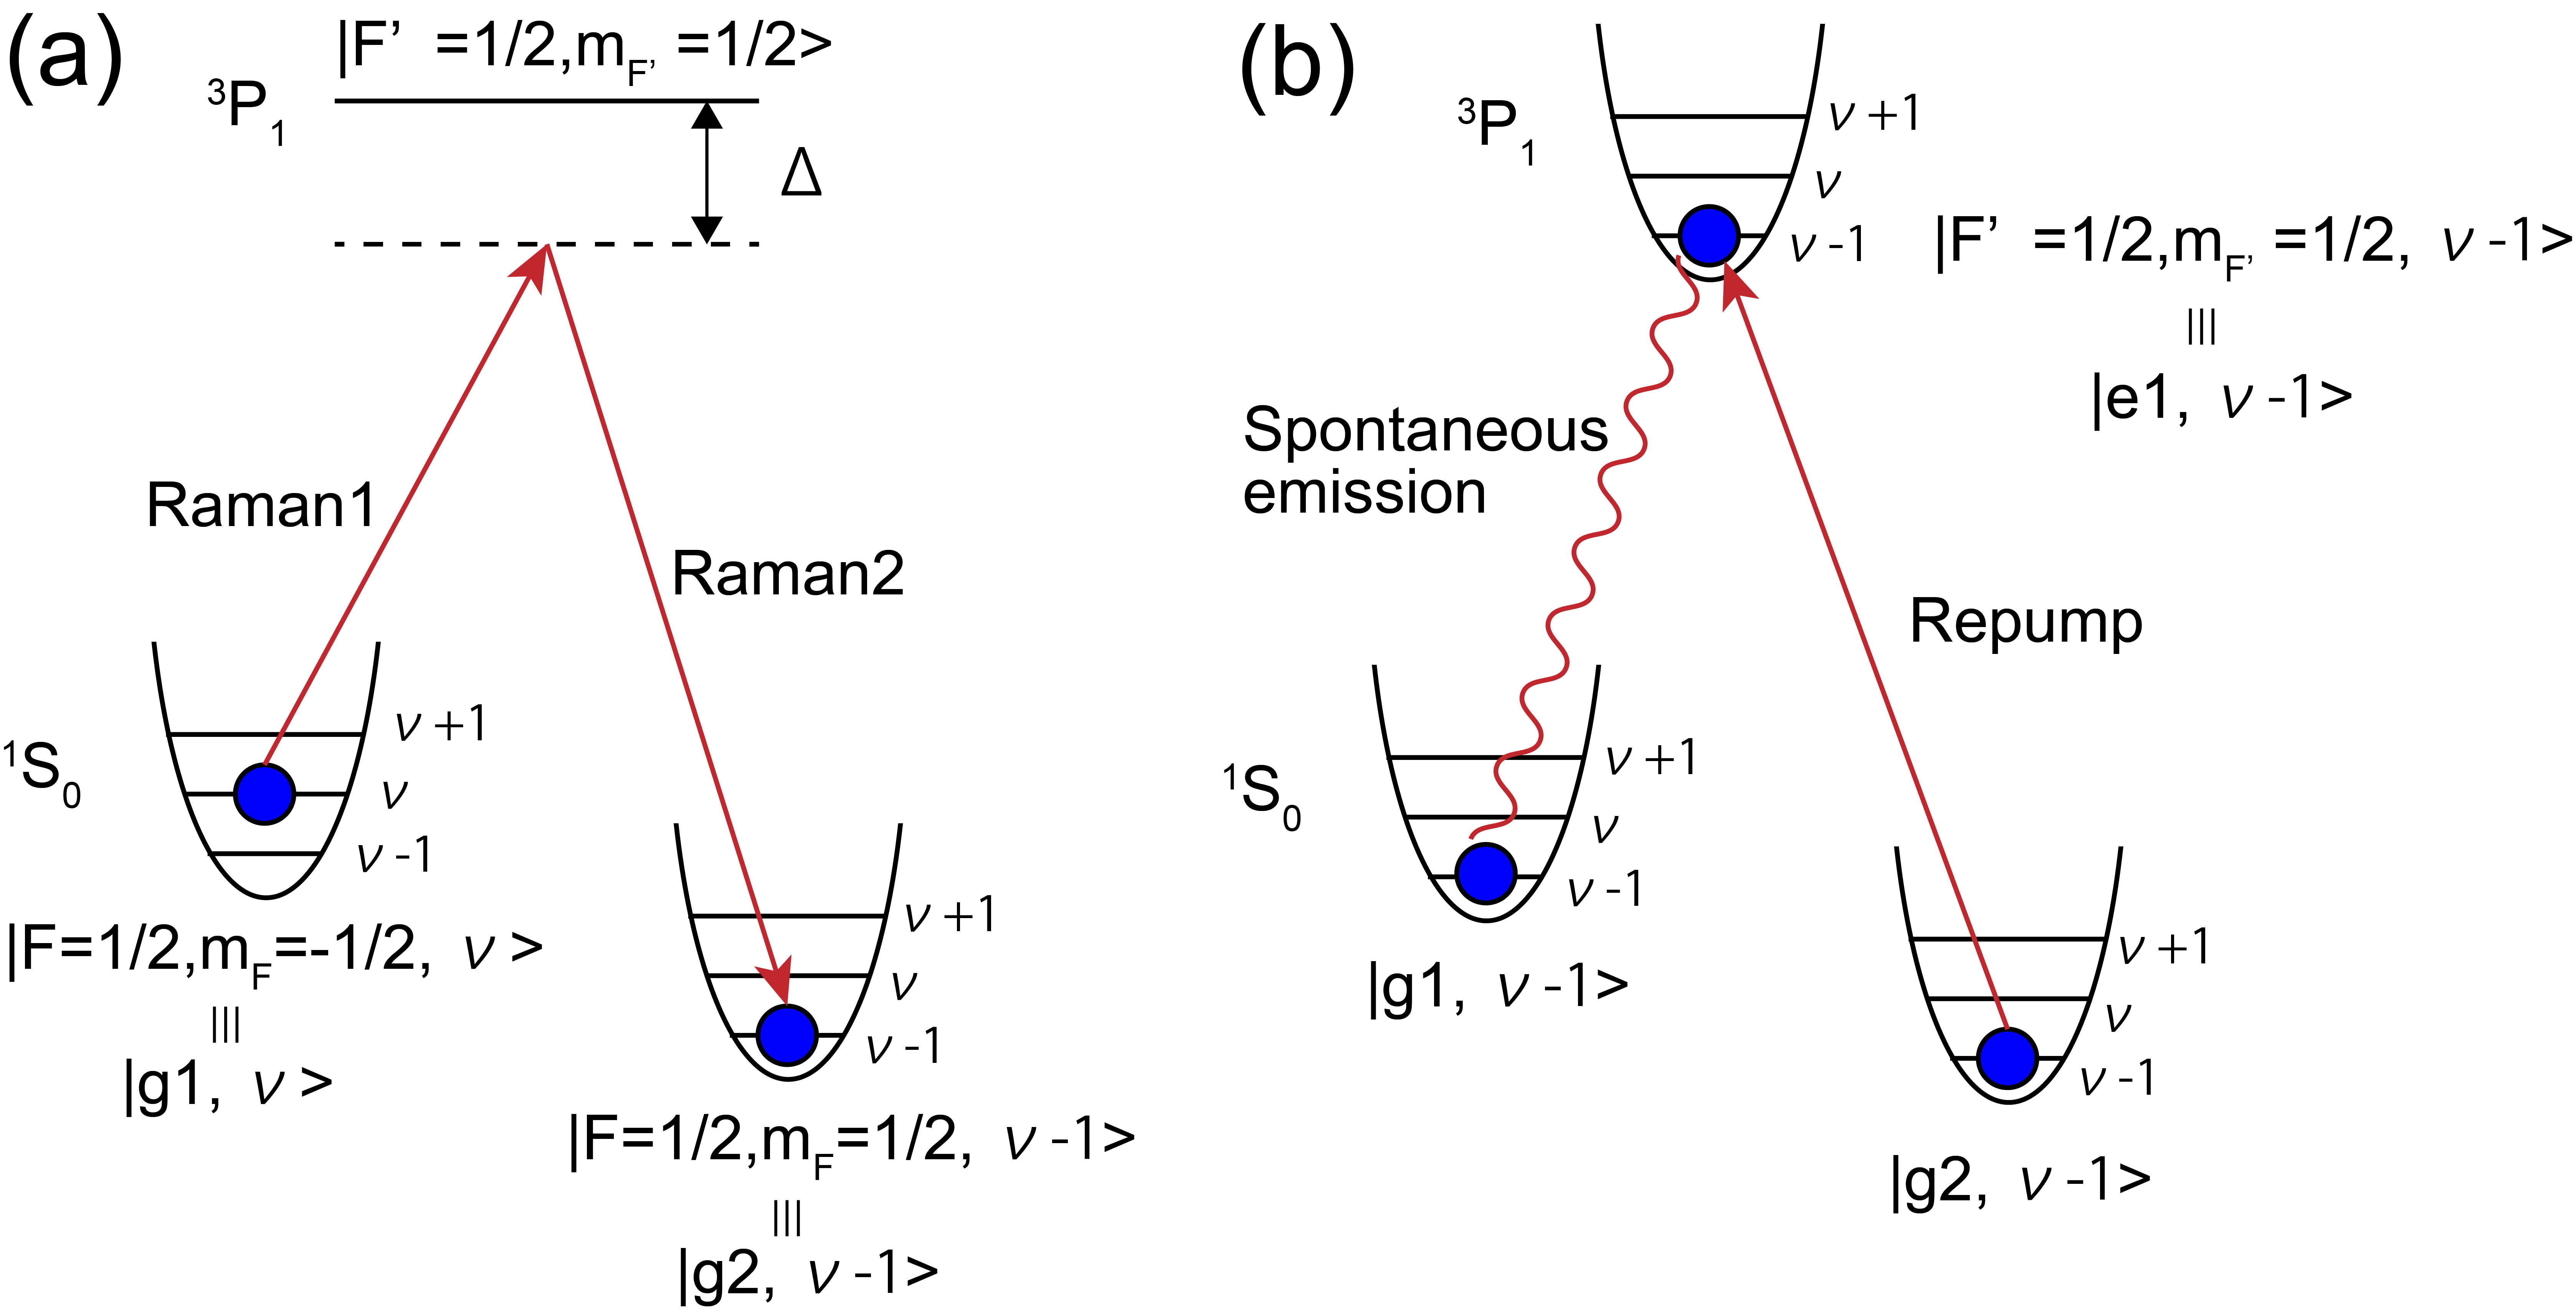
**Figure 1** Simplified scheme of Raman sideband cooling of <sup>171</sup>Yb using 556 nm lasers. (a) Raman transition from $\ket{\nu} \rightarrow \ket{\nu-1}$, where $\nu$ means the vibrational level. (b) Initialization of the internal state using a repump laser.

In the order of their eigenenergies, the states are labeled as
$$\begin{align*}
\left| g1,\nu \right> &= 1S_{0}\left| F=1,m_{F}=-1/2,\nu \right> = \psi[0+\nu]\ (\nu = 0,\dots,N-1) \\
\left| g2,\nu \right> &= 1S_{0}\left| F=1,m_{F}=1/2,\nu \right> = \psi[N+\nu]\ (\nu = 0,\dots,N-1) \\
\left| e1,\nu \right> &= 3P_{1}\left| F^{\prime}=1/2,m_{F^{\prime}}=-1/2,\nu \right> = \psi[2N+\nu]\ (\nu = 0,\dots,N-1) 
\end{align*}$$
where $\nu$ denotes the vibrational state. The density matrix components are then labeled as:
$$\begin{align*}
  \left< g1, \nu \right|\rho(t)\left| g1, \nu \right> & = \rho[\nu][\nu] = y[\nu+3N\nu] \\
  \left< g2, \nu \right|\rho(t)\left| g2, \nu \right> & = \rho[N+\nu][N+\nu] = y[(N+\nu)+3N(N+\nu)] \\
  \left< e1, \nu \right|\rho(t)\left| e1, \nu \right> & = \rho[3N+\nu][3N+\nu] = y[(2N+\nu)+3N(2N+\nu)] \\
\end{align*}$$
In this basis set, the Hamiltonian for each interaction can be expressed as

$$\begin{align*}
\mathcal{H}_{\rm Raman} & = -\frac{\hbar}{2}\begin{pmatrix}
    2\Omega_{\rm R1}^{\rm AC}\mathcal{C}_{1,N} & \Omega_{\rm R}e^{i\delta_{\rm R} t}\mathcal{C}_{{\rm R},N} & 0  \\
    \Omega_{\rm R}^*e^{-i\delta_{\rm R} t}\mathcal{C}_{{\rm R},N}^\dagger & 2\Omega_{\rm R2}^{\rm AC}\mathcal{C}_{2,N} & 0 \\
    0 & 0 & 0  
\end{pmatrix} \\
\mathcal{H}_{\rm Repump} & = \frac{\hbar}{2}\begin{pmatrix}
    0 & 0 &  \Omega_{\rm RP1}e^{i\delta_{\rm RP1}t}\mathcal{C}_{{\rm RP1},N} \\
    0 & 0 & 0  \\
    \Omega_{\rm RP1}^*e^{-i\delta_{\rm RP1}t}\mathcal{C}_{{\rm RP1},N}^\dagger & 0 & 0 
\end{pmatrix} \\
\end{align*}$$
where
$$\begin{align*}
\Omega_{\rm R} & = \frac{\Omega_{11}\Omega_{22}^*}{2\Delta} {\rm \; : Rabi \; frequency \; of \; Raman \; transition} \\
\Omega_1^{\rm AC} & = \frac{|\Omega_{11}|^2}{4\Delta} + \frac{|\Omega_{12}|^2}{4(\Delta + \delta_{\rm R})} {\rm \; : AC \; Stark \; shift \; (light \; shift) \; due \; to \; Raman \; beams} \\
\Omega_2^{\rm AC} & = \frac{|\Omega_{21}|^2}{4(\Delta-\omega_{21})} + \frac{|\Omega_{22}|^2}{4(\Delta + \delta_{\rm R})} \\
\end{align*}$$
and
$$\begin{align*}
\mathcal{C}_{1,N} & = \begin{pmatrix}
  0 & & & \\
   & 1 & & \\
   & & \ddots & \\
   & & & 1
\end{pmatrix} \ : \ {\rm Transition}\ {\rm between}\ \left| g2, \nu \right>\ {\rm and}\ \left| VS, \nu \right>\ ({\rm transition}\ {\rm from}\ \nu = 0\ {\rm will}\ {\rm not}\ {\rm occur}) \\
\mathcal{C}_{2,N} & = \begin{pmatrix}
  1 & & & \\
   & \ddots & & \\
   & & 1 & \\
   & & & 0
\end{pmatrix} \ : \ {\rm Transition}\ {\rm between}\ \left| g1, \nu-1 \right>\ {\rm and}\ \left| VS, \nu \right>\ ({\rm transition}\ {\rm from}\ \nu = N-1\ {\rm will}\ {\rm not}\ {\rm occur})  \\
\mathcal{C}_{{\rm R},N} & = \begin{pmatrix}
  0 & M[1\rightarrow1]M[1\rightarrow0] & & & \\
   & \ddots & \ddots & & \\
   & & \ddots & M[\nu+1\rightarrow\nu+1]M[\nu+1\rightarrow\nu] & \\
   & & & \ddots & \ddots \\
   & & & & \ddots
\end{pmatrix} \ : \ {\rm Transition}\ {\rm between}\ \left| g2, \nu \right>\ {\rm and}\ \left| g1, \nu-1 \right> \\
\mathcal{C}_{RPk,N} & = \begin{pmatrix}
  M[0\rightarrow0] & M[1\rightarrow0] & & \\
  M[0\rightarrow1] & \ddots & \ddots & \\
   & \ddots & \ddots & \ddots & & \\
   & & M[\nu-1\rightarrow\nu] & M[\nu\rightarrow\nu] & M[\nu+1\rightarrow\nu] & \\
   & & & \ddots & \ddots & \ddots
\end{pmatrix} \ : \ {\rm Transition}\ {\rm between}\ \left| e_k, \nu \right>\ {\rm and}\ \left| g_k, \nu(\pm1) \right>
\end{align*}$$

where
$$M[\nu\rightarrow\nu'] = e^{-\frac{\eta^2}{2}}\sqrt{ \frac{\nu_{<}!}{(\nu_{<}+\Delta\nu)!} }\eta^{\Delta\nu}L^{\Delta\nu}_{\nu_{<}}(\eta^2).$$
Truncating the expansion of the Laguerre polynomials at order 2,
$$\begin{align*}
M[\nu-1\rightarrow\nu] & \approx  \sqrt{\nu}\eta \\
M[\nu\rightarrow\nu] & \approx  1 - \left(\nu+\frac{1}{2}\right)\eta^2 \\
M[\nu+1\rightarrow\nu] & \approx  \sqrt{\nu+1}\eta.
\end{align*}$$

Note that the Hamiltonian cannot be transformed into the rotating frame, since each interaction may have different detunings. Thus the time-dependence cannot be removed.


The state of the atoms can be described by the density matrix
$$
\rho(t) := \sum_{i,j}c_ic_j^*\left|\psi_i\right>\left<\psi_j\right|
$$
which follows the Lindblad equation
$$
\frac{d}{dt}\rho(t) = -\frac{i}{\hbar}\left[ \mathcal{H}_{int},\rho(t) \right] + \sum_{paths}L_{decay}.
$$

The Lindblad term for a particular decay path is given by
$$
L_{decay} = \Gamma_{I} \sum_{\Delta\nu = -1, 0, +1}\left[ \Gamma_{\nu\rightarrow\nu+\Delta\nu} \left(|c_{g,\nu+\Delta\nu}(t)|^2\left| e,\nu \right>\left< e,\nu \right| - \frac{1}{2}\left| g,\nu+\Delta\nu \right>\left< g,\nu+\Delta\nu \right|\rho(t) - \frac{1}{2}\rho(t)\left| g,\nu+\Delta\nu \right>\left< g,\nu+\Delta\nu \right|\right) \right]
$$
where
$$\begin{align*}
\Gamma_{\nu \rightarrow \nu-1} & = \eta^2\nu \\
\Gamma_{\nu \rightarrow \nu} & = (1 - \eta^2(2\nu+1)) \\
\Gamma_{\nu \rightarrow \nu+1} & = \eta^2(\nu+1).
\end{align*}$$

Here, $\left| i \right>\left< i \right|$ is a single-element matrix where only the $(i,i)$ element is 1. This acts as a row/column selector when multiplied with a matrix, yielding
$$
|c_{g}(t)|^2\left| e \right>\left< e \right| - \frac{1}{2}\left| g \right>\left< g \right|\rho(t) - \frac{1}{2}\rho(t)\left| g \right>\left< g \right| = |c_{g}(t)|^2\mathcal{S}_{e} - \frac{1}{2}\mathcal{R}_{g}[\rho(t)] - \frac{1}{2}\mathcal{C}_{g}[\rho(t)]
$$
where $\mathcal{S}_{e}$ is a single-entry matrix with only the $(e,e)$ element as 1, $\mathcal{R}_{g}[\rho(t)]$ is a matrix containing only the row $g$ of $\rho(t)$, and $\mathcal{C}_{g}[\rho(t)]$ is a matrix containing only the column $g$ of $\rho(t)$. Rearranging the terms,
$$
L(\rho) = \sum_{paths}L_{decay} = \left[\sum_{I}\sum_{\nu}\sum_{\Delta\nu = -1, 0, +1} \Gamma_{I} \Gamma_{\nu\rightarrow\nu+\Delta\nu} \rho_{g,\nu+\Delta\nu}(t)\mathcal{S}_{e,\nu} \right] - \frac{1}{2} \left[\sum_{I}\sum_{\nu}\sum_{\Delta\nu = -1, 0, +1} \Gamma_{I} \Gamma_{\nu\rightarrow\nu+\Delta\nu}\mathcal{S}_{g,\nu+\Delta\nu}\right]\rho(t) - \frac{1}{2}\rho(t)\left[ \sum_{I}\sum_{\nu}\sum_{\Delta\nu = -1, 0, +1} \Gamma_{I} \Gamma_{\nu\rightarrow\nu+\Delta\nu}\mathcal{S}_{g,\nu+\Delta\nu}\right]
$$
is obtained. In the calculation, the first term is named the "S term", and the factor in brackets in the second and third terms are named the "RC matrix". Note that the RC matrix can be calculated without the values of $\rho$.

The coefficient $\Gamma_{I}$ is given by the product of the decay rate of the particular transition $\left| J, F, m_F \right> \rightarrow \left| J', F', m'_F \right>$:
$$
\Gamma_I = \frac{2\pi}{\tau_{\left| J, F, m_F \right>}} \frac{2J'+1}{2J+1}(-1)^{2F'+J+I+m_F}\sqrt{(2F'+1)(2F+1)(2J+1)}
\begin{pmatrix}
F' & 1 & F \\
m'_F & m_F-m'_F & -m_F
\end{pmatrix}\begin{Bmatrix}
J & J' & 1 \\
F' & F & I
\end{Bmatrix}.
$$

From the symmetries of $3j$ and $6j$ symbols, the normalization condition
$$
\sum_{F,m_F} \left| (-1)^{2F'+J+I+m_F}\sqrt{(2F'+1)(2F+1)(2J+1)}
\begin{pmatrix}
F' & 1 & F \\
m'_F & m_F-m'_F & -m_F
\end{pmatrix}\begin{Bmatrix}
J & J' & 1 \\
F' & F & I
\end{Bmatrix} \right|^2 = 1
$$
exists. Thus,
$$
\sum_{F,m_F} |\Gamma_I|^2 = \left(\frac{2\pi}{\tau_{\left| J, F, m_F \right>}}\frac{2J'+1}{2J+1}\right)^2
$$
holds and the ratio
$$
\frac{|\Gamma_I|^2}{\sum_{F,m_F} |\Gamma_I|^2}
$$
can be considered as the "branching ratio" of the particular decay path $I$ among the competing decay paths from the same level.

The result is given as the "mean vibrational number" as:
$$\begin{align*}
\left<\nu\right> & = \sum_\nu \nu \left| c_{g2,\nu}(t) \right|^2 \\
& = \sum_{\nu = 0}^{N-1} \nu \left< g2,\nu \right| \rho(t) \left| g2,\nu \right>.
\end{align*}$$

Also, the number of scattered photons per unit time can be calculated by
$$
\frac{\delta N_{SP}}{\delta t} = \sum_{\nu}\left[\Gamma_{4,1}|c_{4,\nu}(t)|^2 + (\Gamma_{3,0} + \Gamma_{3,1} + \Gamma_{3,2})|c_{3,\nu}(t)|^2\right].
$$

In order to approximately realize the situation where there are infinitely many vibrational levels, an additional condition is set to the Raman Hamiltonian where the transition from $\nu = N-1$ to $\nu = N-2$ is suppressed.
This can be realized by the substitutions
$$\begin{align*}
\mathcal{C}_{{\rm R},N} & = \begin{pmatrix}
  0 & \left(1-\frac{3}{2}{\eta_{\rm R}}^2\right)\eta_{\rm R} & & & & \\
   & \ddots & \ddots & & & \\
   & & \ddots & \left(1-\frac{2\nu+1}{2}{\eta_{\rm R}}^2\right)\eta_{\rm R}\sqrt{\nu} & & \\
   & & & \ddots & \ddots & \\
   & & & & \ddots & \left(1-\frac{2(N-1)+1}{2}{\eta_{\rm R}}^2\right)\eta_{\rm R}\sqrt{N-1} \rightarrow 0 \\
   & & & & & 0
\end{pmatrix} \\
\mathcal{C}_{RPk,N} & = \begin{pmatrix}
  1-\frac{1}{2}{\eta_k}^2 & \eta_k & & & \\
  \eta_k & \ddots & \ddots & & \\
   & \ddots & \ddots & \ddots & & & \\
   & & \eta_k\sqrt{\nu} & 1-\frac{2\nu+1}{2}{\eta_k}^2 & \eta_k\sqrt{\nu+1} & \\
   & & & \ddots & \ddots & \ddots & \\
   & & & & \ddots & \ddots & \eta_k\sqrt{N-1}\rightarrow0 \\   
   & & & & & \eta_k\sqrt{N-1} & 1-\frac{2(N-1)+1}{2}{\eta_k}^2
\end{pmatrix}.
\end{align*}$$
The effect of this "trapping" can be observed by monitoring the population evolution of the top vibrational state:
$$
\sum_{states} |c_{state,\nu=N-1}(t)|^2.
$$

Finally, the measure of the calculation precision is monitored by the sum of all populations:
$$
\sum_{all}|c_{states}(t)|^2 = \mathrm{Tr}[\rho(t)]
$$
which physically should be normalized to 1 at all times.

# Calculation flow

In [ ]:
## Prerequisites
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from sympy.physics.wigner import wigner_3j
from sympy.physics.wigner import wigner_6j
from tqdm import tqdm

In [ ]:
## Simulation conditions
N = 5 # number of vibrational levels
t_limit = 5 # ms; time range of simulation

In [ ]:
## Simulation parameters
etaR = 0.21
eta1 = 0.17
eta2 = 0.17
eta3 = 0.17

OmegaR = 2*np.pi * 54 # rad kHz
Delta = 2*np.pi * 100*(10**6) # rad kHz
deltaR = 2*np.pi * 0 # rad kHz
OmegaACR2 = (1/2) * (Delta/(Delta+deltaR)) * OmegaR # rad kHz
OmegaACR1 = (1/2) * OmegaR # rad kHz
OmegaRP1 = 2*np.pi * 149 # rad kHz
deltaRP1 = 2*np.pi * 0 # rad kHz
OmegaRP2 = 2*np.pi * 86 # rad kHz
deltaRP2 = 2*np.pi * 2000 # rad kHz
OmegaRP3 = 2*np.pi * 47 # rad kHz
deltaRP3 = 2*np.pi * 0 # rad kHz

etaS = 0.17

In [ ]:
## Useful functions

def krDelta (i,j):
  if i == j:
    return 1
  else:
    return 0

def index_1d (ST,VL):
    # ST = (0,1,2,3,4) <=> g1,g2,g3,e1,e2
    # VL = 0,1,2,...,N-1
    return (ST*N + VL) * (5*N + 1)

def index_2d (ST,VL):
    # ST = (0,1,2,3,4) <=> g1,g2,g3,e1,e2
    # VL = 0,1,2,...,N-1
    return ST*N + VL

def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0:
       return v
    return v / norm

In [ ]:
## Sub-matrices

# C_1
C_1 = np.eye(N,dtype=np.complex64)
C_1[0][0] = 0

# C_2
C_2 = np.eye(N,dtype=np.complex64)
C_2[N-1][N-1] = 0

# C_R
crvec = np.array([(1-((2*(j+1)+1)/2)*etaR*etaR)*etaR*np.sqrt(j+1) for j in range(N-1)])
crvec[N-2] = 0 # N-1 --> N-2 cooling suppressed
C_R = np.diag(crvec, k=1)

# C_RP1
crpdiag = np.array([1-((2*j+1)/2)*eta1*eta1 for j in range(N)], dtype=np.complex64)
C_RP1_carrier = np.diag(crpdiag, k=0) # carrier
crpoffd = np.array([eta1*np.sqrt(j+1) for j in range(N-1)], dtype=np.complex64)
C_RP1_CSB = np.diag(crpoffd, k=1) # cooling only
C_RP1_CSB[N-2][N-1] = 0 # N-1 --> N-2 cooling suppressed
C_RP1_HSB = np.diag(crpoffd, k=-1) # heating only
C_RP1 = C_RP1_CSB + C_RP1_HSB + C_RP1_carrier

# C_RP2
crpdiag = np.array([1-((2*j+1)/2)*eta2*eta2 for j in range(N)], dtype=np.complex64)
C_RP2_carrier = np.diag(crpdiag, k=0) # carrier
crpoffd = np.array([eta2*np.sqrt(j+1) for j in range(N-1)], dtype=np.complex64)
C_RP2_CSB = np.diag(crpoffd, k=1) # cooling only
C_RP2_CSB[N-2][N-1] = 0 # N-1 --> N-2 cooling suppressed
C_RP2_HSB = np.diag(crpoffd, k=-1) # heating only
C_RP2 = C_RP2_CSB + C_RP2_HSB + C_RP2_carrier

# C_RP3
crpdiag = np.array([1-((2*j+1)/2)*eta3*eta3 for j in range(N)], dtype=np.complex64)
C_RP3_carrier = np.diag(crpdiag, k=0) # carrier
crpoffd = np.array([eta3*np.sqrt(j+1) for j in range(N-1)], dtype=np.complex64)
C_RP3_CSB = np.diag(crpoffd, k=1) # cooling only
C_RP3_CSB[N-2][N-1] = 0 # N-1 --> N-2 cooling suppressed
C_RP3_HSB = np.diag(crpoffd, k=-1) # heating only
C_RP3 = C_RP3_CSB + C_RP3_HSB + C_RP3_carrier

In [ ]:
## Interaction Hamiltonian

Z = np.zeros((5*N,5*N),dtype=np.complex64)

# H_Raman
# diagonal
H_Raman_d = Z.copy()
H_Raman_d[0*N:1*N,0*N:1*N] = 2*OmegaACR2*C_2
H_Raman_d[1*N:2*N,1*N:2*N] = 2*OmegaACR1*C_1
H_Raman_d *= -0.5

# off-diagonal
H_Raman_o = Z.copy()
H_Raman_o[0*N:1*N,1*N:2*N] = OmegaR*C_R
H_Raman_o[1*N:2*N,0*N:1*N] = OmegaR*C_R.T
H_Raman_o *= -0.5

# H_RP1 [0 <-> 3]
H_RP1 = Z.copy()
H_RP1[0*N:1*N,3*N:4*N] = OmegaRP1 * C_RP1
H_RP1[3*N:4*N,0*N:1*N] = OmegaRP1 * C_RP1.T
H_RP1 *= 0.5

# H_RP2 [2 <-> 3]
H_RP2 = Z.copy()
H_RP2[2*N:3*N,3*N:4*N] = OmegaRP2 * C_RP2
H_RP2[3*N:4*N,2*N:3*N] = OmegaRP2 * C_RP2.T
H_RP2 *= 0.5

# H_RP3 [1 <-> 4]
H_RP3 = Z.copy()
H_RP3[1*N:2*N,4*N:5*N] = OmegaRP3 * C_RP3
H_RP3[4*N:5*N,1*N:2*N] = OmegaRP3 * C_RP3.T
H_RP3 *= 0.5

def H_int (t):
    Raman = np.triu(H_Raman_o,k=-1) * np.exp(1j*deltaR*t)
    Raman += np.tril(H_Raman_o,k=-1) * np.exp(-1j*deltaR*t)
    Raman += H_Raman_d
    RP1 = np.triu(H_RP1,k=-1) * np.exp(1j*deltaRP1*t)
    RP1 += np.tril(H_RP1,k=-1) * np.exp(-1j*deltaRP1*t)
    RP2 = np.triu(H_RP2,k=-1) * np.exp(1j*deltaRP2*t)
    RP2 += np.tril(H_RP2,k=-1) * np.exp(-1j*deltaRP2*t)
    RP3 = np.triu(H_RP3,k=-1) * np.exp(1j*deltaRP3*t)
    RP3 += np.tril(H_RP3,k=-1) * np.exp(-1j*deltaRP3*t)
    return Raman + RP1 + RP2 + RP3

In [ ]:
## Lindblad terms (spontaneous emission)

def GeoFactor (I,J,F,mF,Jp,Fp,mFp):
    sgn = (-1)**(2*Fp+J+I+mF)
    rt = np.sqrt((2*Fp+1)*(2*F+1)*(2*J+1))
    tri = float(wigner_3j(Fp,1,F,mFp,mF-mFp,-mF))
    hex = float(wigner_6j(J,Jp,1,Fp,F,I))
    GeoFac = sgn * rt * tri * hex
    return GeoFac

def GammaFactor (ji,jf):
    tau , I = 26.2*10**(-6), 3/2
    invtau  = 2*np.pi/tau # rad kHz
    J, Jp = 3/2, 1/2 # 5P3/2 --> 5S1/2
    JJ = (2*Jp+1)/(2*J+1)
    if ji==3 and jf==0: # |2, -2> --> |1, -1>
        F, mF, Fp, mFp = 2, -2, 1, -1
        Gamma = invtau * JJ * GeoFactor(I,J,F,mF,Jp,Fp,mFp)
    elif ji==3 and jf==1: # |2, -2> --> |2, -2>
        F, mF, Fp, mFp = 2, -2, 2, -2
        Gamma = invtau * JJ * GeoFactor(I,J,F,mF,Jp,Fp,mFp)
    elif ji==3 and jf==2: # |2, -2> --> |2, -1>
        F, mF, Fp, mFp = 2, -2, 2, -1
        Gamma = invtau * JJ * GeoFactor(I,J,F,mF,Jp,Fp,mFp)
    elif ji==4 and jf==1: # |3, -3> --> |2, -2>
        F, mF, Fp, mFp = 3, -3, 2, -2
        Gamma = invtau * JJ * GeoFactor(I,J,F,mF,Jp,Fp,mFp)
    else:
        Gamma = invtau * JJ
    return Gamma

gtot = abs(round(GammaFactor(0,0),-3))
g30 = abs(round(GammaFactor(3,0),-3))
g31 = abs(round(GammaFactor(3,1),-3))
g32 = abs(round(GammaFactor(3,2),-3))
g41 = abs(round(GammaFactor(4,1),-3))
# print(r'$\sqrt{\sum_{F,mF}\left|\Gamma_I\right|^2} = 2\pi\times$ %3.1e kHz'%(gtot/(2*np.pi)))
# print(r'$BR_{3,0} = $%3.1f %%'%(100*(g30/gtot)**2))
# print(r'$BR_{3,1} = $%3.1f %%'%(100*(g31/gtot)**2))
# print(r'$BR_{3,2} = $%3.1f %%'%(100*(g32/gtot)**2))
# print(r'$BR_{4,1} = $%3.1f %%'%(100*(g41/gtot)**2))

# nu -> nu' coupling rates
cooling = np.array([ (etaS*etaS*VL) for VL in range(N)], dtype=np.complex64)
cooling[N-1] = 0 # N-1 --> N-2 cooling suppressed
carrier = np.array([ (1-etaS*etaS*(2*VL+1)) for VL in range(N)], dtype=np.complex64)
heating = np.array([ (etaS*etaS*(VL+1)) for VL in range(N)], dtype=np.complex64)

# R/C matrix
RC = Z.copy()
RC[0*N:1*N,0*N:1*N] += g30 * np.diag(np.append(cooling[1:N],0) + carrier + np.append(0,heating[0:N-1]))
RC[1*N:2*N,1*N:2*N] += g31 * np.diag(np.append(cooling[1:N],0) + carrier + np.append(0,heating[0:N-1]))
RC[2*N:3*N,2*N:3*N] += g32 * np.diag(np.append(cooling[1:N],0) + carrier + np.append(0,heating[0:N-1]))
RC[1*N:2*N,1*N:2*N] += g41 * np.diag(np.append(cooling[1:N],0) + carrier + np.append(0,heating[0:N-1]))

S_term = Z.copy()

def LSO (rho):
    global S_term
    S_term.fill(0)
    cgg = np.diag(rho) # array of |c|^2 's
    # for path 30
    S_term[3*N:4*N,3*N:4*N] += g30 * np.diag(cooling*np.append(0,cgg[0*N:1*N-1]) + carrier*cgg[0*N:1*N] + heating*np.append(cgg[0*N+1:1*N],0))
    # for path 31
    S_term[3*N:4*N,3*N:4*N] += g31 * np.diag(cooling*np.append(0,cgg[1*N:2*N-1]) + carrier*cgg[1*N:2*N] + heating*np.append(cgg[1*N+1:2*N],0))
    # for path 32
    S_term[3*N:4*N,3*N:4*N] += g32 * np.diag(cooling*np.append(0,cgg[2*N:3*N-1]) + carrier*cgg[2*N:3*N] + heating*np.append(cgg[2*N+1:3*N],0))
    # for path 41
    S_term[4*N:5*N,4*N:5*N] += g41 * np.diag(cooling*np.append(0,cgg[1*N:2*N-1]) + carrier*cgg[1*N:2*N] + heating*np.append(cgg[1*N+1:2*N],0))
    return S_term - 0.5*RC@rho - 0.5*rho@RC

In [ ]:
## Lindblad equation (right-hand-side)

def RSC(t, y, pbar, state):
    ## timekeeper
    last_t, dt = state
    n = int((t - last_t)/dt)
    pbar.update(n)
    state[0] = last_t + dt * n

    ## coherence terms
    H = H_int(t).view()
    rho = y.reshape([5*N,5*N])
    coherence = -1j * (H@rho - rho@H)

    ## decoherence terms
    decoherence = LSO(rho).view()

    drhodt = coherence + decoherence
    # drhodt = coherence.view() # neglect spontaneous emission
    RHS = drhodt.reshape(-1)
    return RHS

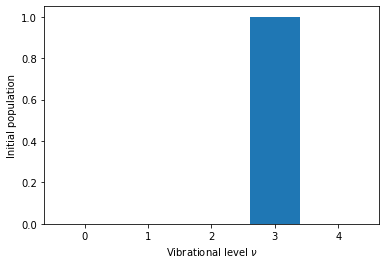

In [ ]:
## Initial condition

## 100% population at state = STATE, nu = VLEVEL
STATE = 1 # = g2
VLEVEL = N-2

def init_state(i):
    val = krDelta(i,index_1d(STATE,VLEVEL))
    return val

plt.bar([VL for VL in range(N)],[init_state(index_1d(STATE,VL)) for VL in range(N)], align="center")
plt.xlabel(r'Vibrational level $\nu$')
plt.ylabel('Initial population')

rho_init = np.array([init_state(i) for i in range(5*N*5*N)], dtype=np.complex64)

In [ ]:
## Solve the Lindblad equation

with tqdm(total=t_limit*1000, unit="us") as pbar:
    sol = solve_ivp(RSC, (0, t_limit), rho_init, rtol=1e-13, args=[pbar, [0, 1/1000]])

100%|█████████▉| 4999/5000 [28:42<00:00,  2.90us/s]


Text(0, 0.5, 'Mean Vibrational Level $\\left< \\nu \\right>$')

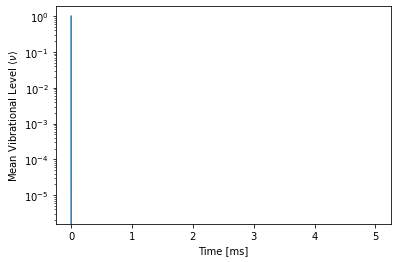

In [ ]:
## Mean Vibrational Level (from 0 to N-2) at g2 state

def MVL (y, N):
  ST = 1
  val = 0
  for VL in range(N-1):
    val = val + VL * y[index_1d(ST,VL)].real
  return val/(N-2)

plt.plot(sol.t, MVL(sol.y,N))
plt.yscale('log')
plt.xlabel('Time [ms]')
plt.ylabel(r'Mean Vibrational Level $\left< \nu \right>$')

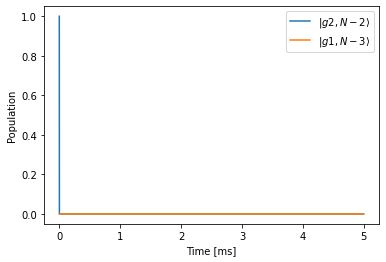

In [ ]:
## Populations of selected levels

plt.plot(sol.t, np.abs(sol.y[index_1d(1,N-2)]),label=r'$\left| g2,N-2 \right>$')
plt.plot(sol.t, np.abs(sol.y[index_1d(0,N-3)]),label=r'$\left| g1,N-3 \right>$')
#plt.xlim(0,0.0001)
plt.xlabel('Time [ms]')
plt.ylabel('Population')
plt.legend(loc='upper right')

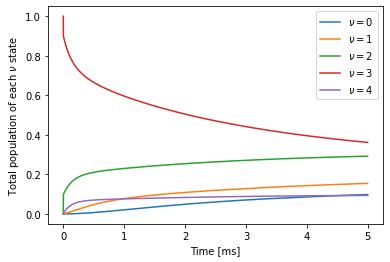

In [ ]:
## Total populations of each nu state

def Ptrap (y, VL):
    val = 0
    for ST in range(5):
        val = val + y[index_1d(ST,VL)].real
    return val

for VL in range(N):
    plt.plot(sol.t, Ptrap(sol.y,VL), label=r'$\nu = %d$'%VL)
plt.xlabel('Time [ms]')
plt.ylabel(r'Total population of each $\nu$ state')
plt.legend(loc='upper right')

Text(0, 0.5, 'Total population of $\\nu=N-1$ states')

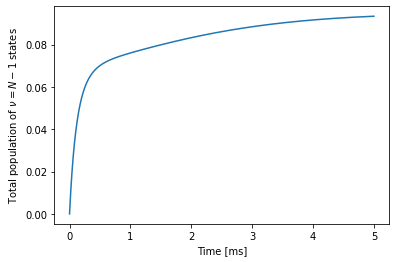

In [ ]:
## Fractional loss

plt.plot(sol.t, Ptrap(sol.y,N-1))
plt.xlabel('Time [ms]')
plt.ylabel(r'Total population of $\nu=N-1$ states')

Text(0, 0.5, 'Photon Scattering Rate [/ms]')

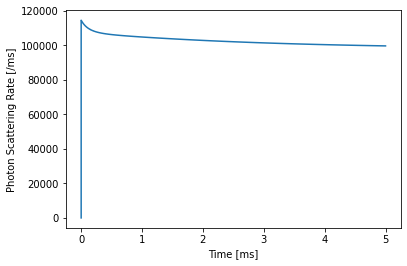

In [ ]:
## Photon Scattering Rate

def PSR (y, N):
  val = 0
  for VL in range(N-1):
    val = val + (GammaFactor(3,0)+GammaFactor(3,1)+GammaFactor(3,2))*y[(3*N+VL)*5*N + (3*N+VL)].real + GammaFactor(4,1)*y[(4*N+VL)*5*N + (4*N+VL)].real
  return val

plt.plot(sol.t, PSR(sol.y,N))
plt.xlabel('Time [ms]')
plt.ylabel('Photon Scattering Rate [/ms]')

Text(0, 0.5, 'Sum of populations of all states\n(should be normalized to 1)')

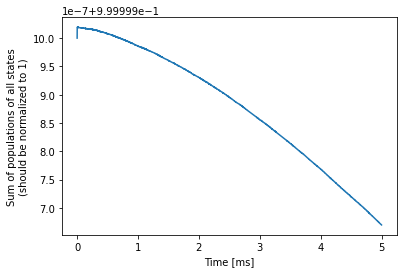

In [ ]:
## check normalization of total population \sum_{levels} rho(level,level)

def total_population (y,N):
    val = 0
    for L in range(5*N):
        val = val + y[L*5*N + L].real
    return val

plt.plot(sol.t, total_population(sol.y,N))
#plt.ylim(0.99999999999999,1.00000000000001)
plt.xlabel('Time [ms]')
plt.ylabel('Sum of populations of all states\n(should be normalized to 1)')